In [62]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
raw = pd.read_csv('times.csv')
raw

,unroll,time,KernelName,gpu-id,queue-id,queue-index,pid,tid,grd,wgr,...,obj,Wavefronts,VALUInsts,SALUInsts,SFetchInsts,GDSInsts,VALUBusy,MemUnitStalled,FetchSize,WriteSize
0,1,28.851585,"image_gamma(unsigned char*, float, int) [clone...",2,0,1,617606,617606,524288,256,...,0x7f428714c640,8192.0,279565.000000,20026.000000,4.0,0.0,92.222088,3.928440,7.864805e+05,7.864320e+05
1,2,28.000032,"image_gamma(unsigned char*, float, int) [clone...",2,0,1,617855,617855,524288,256,...,0x7f73c6bbc640,8192.0,274957.000000,14651.000000,4.0,0.0,93.268652,2.956741,7.864852e+05,7.864320e+05
2,3,27.731558,"image_gamma(unsigned char*, float, int) [clone...",2,0,1,618120,618120,524288,256,...,0x7fba872c8640,8192.0,273422.000000,14907.000000,4.0,0.0,93.383659,2.628773,7.865125e+05,7.864320e+05
3,4,27.884312,"image_gamma(unsigned char*, float, int) [clone...",2,0,1,618384,618384,524288,256,...,0x7f2806ea8640,8192.0,273805.000000,13500.000000,4.0,0.0,93.713797,2.556530,7.865228e+05,7.864320e+05
4,5,28.004047,"image_gamma(unsigned char*, float, int) [clone...",2,0,1,618633,618633,524288,256,...,0x7f4764030640,8192.0,272807.665039,13884.003296,4.0,0.0,93.683117,2.728975,7.865222e+05,7.864320e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,123,57.961929,"image_gamma(unsigned char*, float, int) [clone...",2,0,1,649328,649328,524288,256,...,0x7f60a41a0640,8192.0,276620.830200,13043.943726,4.0,0.0,42.775375,11.461776,1.183256e+07,1.289989e+07
123,124,61.150105,"image_gamma(unsigned char*, float, int) [clone...",2,0,1,649598,649598,524288,256,...,0x7f81f5240640,8192.0,275802.390137,13013.631348,4.0,0.0,40.246157,10.862732,1.233201e+07,1.325011e+07
124,125,57.277782,"image_gamma(unsigned char*, float, int) [clone...",2,0,1,649864,649864,524288,256,...,0x7f563ef40640,8192.0,277404.963867,13082.083008,4.0,0.0,42.622402,11.616474,1.150956e+07,1.257503e+07
125,126,54.189911,"image_gamma(unsigned char*, float, int) [clone...",2,0,1,650140,650140,524288,256,...,0x7f1a17440640,8192.0,276775.906006,13051.937622,4.0,0.0,42.789321,11.489938,1.175994e+07,1.269896e+07


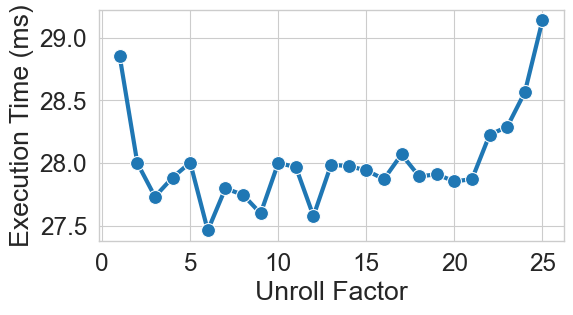

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

sns.lineplot(x='unroll', y='time',  data=raw[raw['unroll'] <= 25],
             marker='o', markersize=10, lw=3, markevery=1, 
              ax=ax
             )
ax.set_xlabel('Unroll Factor')
# ax.set_xticks([1, 2, 4, 6, 8, 10, 12, 14, 16])
ax.set_ylabel('Execution Time (ms)')

plt.savefig('exec_time_start.pdf', bbox_inches='tight')

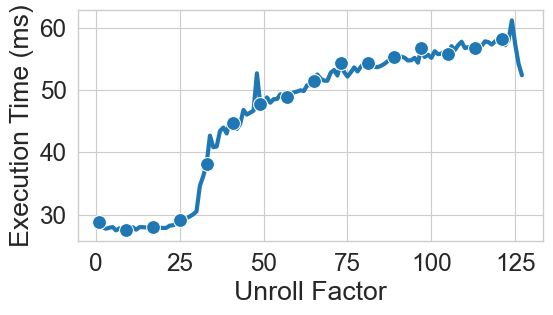

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

sns.lineplot(x='unroll', y='time',  data=raw,
             marker='o', markersize=10, lw=3, markevery=8, 
              ax=ax
             )
ax.set_xlabel('Unroll Factor')
ax.set_ylabel('Execution Time (ms)')

plt.savefig('exec_time.pdf', bbox_inches='tight')

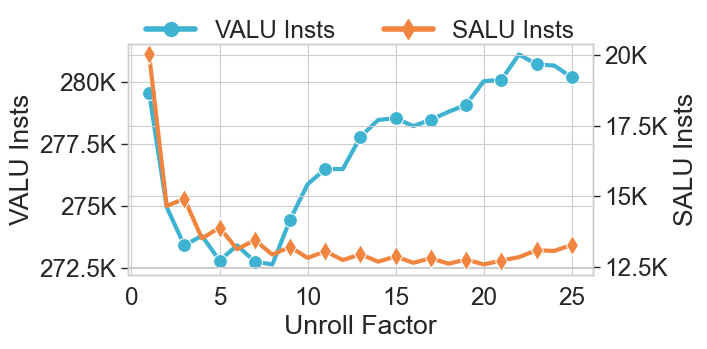

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

sns.lineplot(x='unroll', y='VALUInsts',  data=raw[raw['unroll'] <= 25],
             color='#3db2d1',
             marker='o', markersize=10, lw=3, markevery=2, 
              ax=ax
             )

ax2 = ax.twinx()
sns.lineplot(x='unroll', y='SALUInsts',  data=raw[raw['unroll'] <= 25],
             marker='d', markersize=10, lw=3, markevery=2, 
             color='#f1843f',
              ax=ax2
)

ax.set_xlabel('Unroll Factor')
ax.set_ylabel('VALU Insts')
ax.set_yticks([272500, 275000, 277500, 280000])
ax.set_yticklabels(['272.5K', '275K', '277.5K', '280K'])

ax2.set_ylabel('SALU Insts')
ax2.set_yticks([12500, 15000, 17500, 20000])
ax2.set_yticklabels(['12.5K', '15K', '17.5K', '20K'])

# Generate legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#3db2d1', lw=4, marker='o', 
                       markersize=10),
                Line2D([0], [0], color='#f1843f', lw=4, marker='d', 
                       markersize=10)]
ax.legend(custom_lines, ['VALU Insts', 'SALU Insts'], 
          frameon=False,
          fancybox=None, 
          loc='upper center',
          bbox_to_anchor=(0.5, 1.2),
          ncol=2)


plt.savefig('instructions.pdf', bbox_inches='tight')

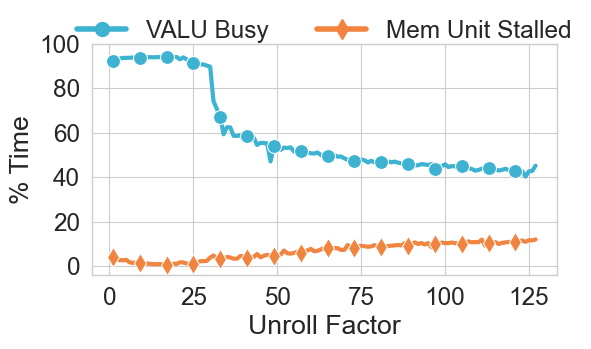

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

sns.lineplot(x='unroll', y='VALUBusy',  data=raw,
             color='#3db2d1',
             marker='o', markersize=10, lw=3, markevery=8, 
              ax=ax
             )

# ax2 = ax.twinx()
sns.lineplot(x='unroll', y='MemUnitStalled',  data=raw,
             marker='d', markersize=10, lw=3, markevery=8, 
             color='#f1843f',
             ax=ax
)

ax.set_xlabel('Unroll Factor')
ax.set_ylabel('% Time')
ax.set_yticks([0, 20, 40, 60, 80, 100])
# ax.set_yticklabels(['272.5K', '275K', '277.5K', '280K'])

# ax2.set_ylabel('% Time Mem Unit Stalled')
# ax2.set_yticks([12500, 15000, 17500, 20000])
# ax2.set_yticklabels(['12.5K', '15K', '17.5K', '20K'])

# Generate legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#3db2d1', lw=4, marker='o', 
                       markersize=10),
                Line2D([0], [0], color='#f1843f', lw=4, marker='d', 
                       markersize=10)]
ax.legend(custom_lines, ['VALU Busy', 'Mem Unit Stalled'], 
          frameon=False,
          fancybox=None, 
          loc='upper center',
          bbox_to_anchor=(0.5, 1.2),
          ncol=2)


plt.savefig('utilization.pdf', bbox_inches='tight')

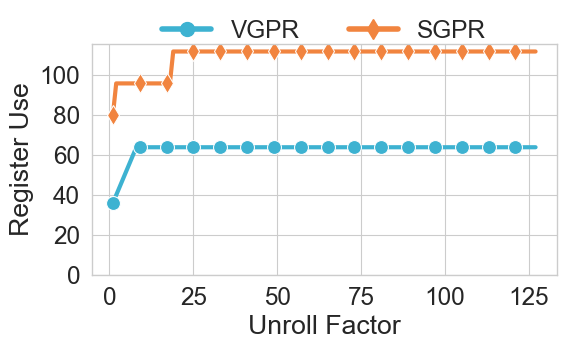

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

sns.lineplot(x='unroll', y='arch_vgpr',  data=raw,
             color='#3db2d1',
             marker='o', markersize=10, lw=3, markevery=8, 
              ax=ax
             )

# ax2 = ax.twinx()
sns.lineplot(x='unroll', y='sgpr',  data=raw,
             marker='d', markersize=10, lw=3, markevery=8, 
             color='#f1843f',
             ax=ax
)

ax.set_xlabel('Unroll Factor')
ax.set_ylabel('Register Use')
ax.set_yticks([0, 20, 40, 60, 80, 100])
# ax.set_yticklabels(['272.5K', '275K', '277.5K', '280K'])

# ax2.set_ylabel('% Time Mem Unit Stalled')
# ax2.set_yticks([12500, 15000, 17500, 20000])
# ax2.set_yticklabels(['12.5K', '15K', '17.5K', '20K'])

# Generate legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#3db2d1', lw=4, marker='o', 
                       markersize=10),
                Line2D([0], [0], color='#f1843f', lw=4, marker='d', 
                       markersize=10)]
ax.legend(custom_lines, ['VGPR', 'SGPR'], 
          frameon=False,
          fancybox=None, 
          loc='upper center',
          bbox_to_anchor=(0.5, 1.2),
          ncol=2)


plt.savefig('utilization.pdf', bbox_inches='tight')

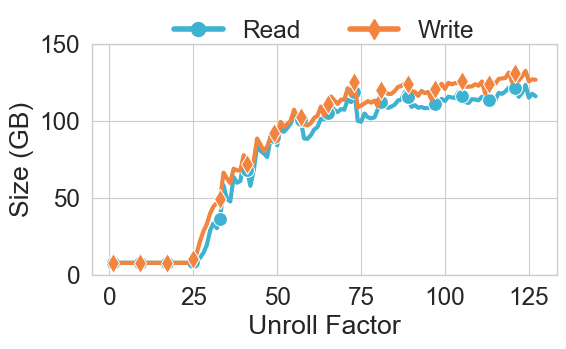

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

sns.lineplot(x='unroll', y='FetchSize',  data=raw,
             color='#3db2d1',
             marker='o', markersize=10, lw=3, markevery=8, 
              ax=ax
             )

# ax2 = ax.twinx()
sns.lineplot(x='unroll', y='WriteSize',  data=raw,
             marker='d', markersize=10, lw=3, markevery=8, 
             color='#f1843f',
             ax=ax
)

ax.set_xlabel('Unroll Factor')
ax.set_ylabel('Size (GB)')
ax.set_yticks([0, 0.5e7, 1e7, 1.5e7])
ax.set_yticklabels(['0', '50', '100', '150'])

# ax2.set_ylabel('% Time Mem Unit Stalled')
# ax2.set_yticks([12500, 15000, 17500, 20000])
# ax2.set_yticklabels(['12.5K', '15K', '17.5K', '20K'])

# Generate legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#3db2d1', lw=4, marker='o', 
                       markersize=10),
                Line2D([0], [0], color='#f1843f', lw=4, marker='d', 
                       markersize=10)]
ax.legend(custom_lines, ['Read', 'Write'], 
          frameon=False,
          fancybox=None, 
          loc='upper center',
          bbox_to_anchor=(0.5, 1.2),
          ncol=2)


plt.savefig('mem_size.pdf', bbox_inches='tight')